# Students
## José Pedro Baião Castanheira, 76545
## Nuno Barbosa, 73796


# Report

## Wine dataset description

The wine dataset used refers to the quality of portuguese red wine. It is comprissed of 12 numeric (real) features:
1. Fixed acidity
2. Volatile acidity
3. Citric acidity
4. Residual Sugar
5. Chlorides
6. Free sulfur dioxide
7. Total sulfur dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol

The label is the quality of the wine, an integer number ranging from 0 to 10.
The dataset is clearly unbalanced, which is examined further ahead - there are many more medium wines than excelent or poor wines.

## Car dataset description

The Car dataset is a categorical type with the following columns:

1. Buying
2. Maint
3. Doors
4. Persons
5. Lug_boot
6. Safety

The label is the classe of the car, it assumes de values of 'unacc', 'acc', 'good', 'vgood'.

## Pre-processing and PCA
For the wine dataset, before applying any learning model, we start by pre-processing the data. After analyzing it's detailed information we move to balance the dataset. Concretly, every wine with class bellow 5, will be assigned to class 5, and every wine with class above 6 will be assigned to class 6.
After, as stated in the dataset source, we scrutinize the relevance of some of the features in the dataset, and reduce the dimension of the dataset by applying PCA. Specifically, we conclude that there are 6 dimensions which guarantee 99% of the variance of the data, and thus, the data is projected onto this six dimensions.

For the car dataset, because it is a categorical dataset, the label were transformed in integer numbers, as follows:

0 - Unaccessible;
1 - Accessible;
2 - Good;
3 - Very Good;

## Learning models applied
### Wine dataset
For the case of the wine dataset, the learning models applied were the Multi-layer perceptron and Random Forest.
#### Multi-layer Perceptron
In the multi-layer perceptron the topology of the network, as well as the learning rate, are changed in order to achieve the best accuracy. The MLP architecture will vary between 1 and 2 hidden layers, and the number of perceptrons present in each one will vary between 1 and 10 for the first hidden layer, and 0 and 10 for the second hidden layer (bear in mind that the first hidden layer can't have zero perceptrons). The learning rate will vary in the set of values [0.1, 0.01, 0.001, 0.0001]
#### Random Forest
Regarding the Random Forest, the size of each tree and the number of estimators was changed. The model was trained for a number of estimators ranging from 1 to 100. After finding the best number of estimators, we move on to find the best size for the estimators.

We finish by presenting the confusion matrix of each model with the optimal parameters.

### Car dataset
#### SVM
In the car dataset the learning model used was Support Vector Machine. The hyperparameter altered is the parameter C. C will take values between 1 and 200.

## Results
### Wine dataset
To evaluate the models, accuracy was used as the main indicator of model performance. In the MLP model we conclude that the optimal network architecture is a single layer with 4 neurons, with an accuracy of 76.25%. The optimal learning rate was found at 0.1. Furthermore, we also note that the learning rate, in the range where it was considered, caused no visible impact on performance.
For the Random Forest, the optimal architecture was 9 estimators with depth 9. This Random Forest yielded a performance slightly higher than the MLP, rouding 78%.

### Car dataset
The SVM yielded a great accuracy on the car dataset. The worst performance was achieved with C equal to 1, rounding 83% accuracy (even better then the MLP for the wine dataset). For C=88 and onwards, the performance was 99.5% for accuracy.

In [3]:
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
from sklearn.decomposition import PCA
import numpy as np
from numpy import linalg as LA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Wine Dataset
## Data pre-processing

In [4]:
df = pd.read_csv("winequality-red.csv",header = 0,sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


###### Check how many different classes are there.
Following, we can see, for each feature, the mean value, standard deviation, minimum and maximum.

In [5]:
print(df.describe())
print(df.quality.unique())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

The following plot shows the distribution of the wines in the different categories. As stated initially 

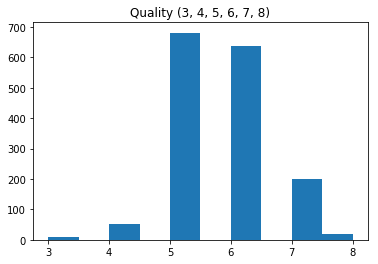

In [6]:
a=df['quality']
plt.hist(a)
plt.title('Quality (3, 4, 5, 6, 7, 8)')
plt.show()

###### The dataset is clearly unbalanced. We will consider any value below 5, to be equal to 5. Analogously, any value above 6 will be set to 6

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


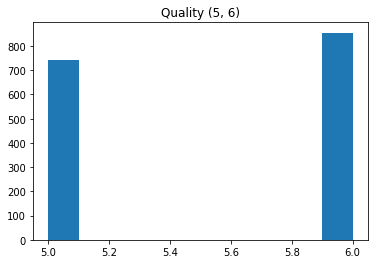

Number of rows with label 5:  744
Number of rows with label 6:  855


In [7]:
label_6 = 0
label_5 = 0
size = len(df['quality'])
for i in range(0,size):
    if(df['quality'][i]<=5):
        df['quality'][i] = 5
        label_5+=1
    else:
        df['quality'][i] = 6
        label_6+=1

a = df['quality']
plt.hist(a)        
plt.title('Quality (5, 6)')
plt.show()
print('Number of rows with label 5: ',label_5)
print('Number of rows with label 6: ',label_6)

###### Check if there any missing values

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

###### Separate features from label

In [9]:
label = df['quality']
#print(label)
features = df.drop('quality', 1)
#print(features)

#### Principal Component Analysis

In [10]:
X = features.values # numpy array version of the data
#print(X)
#print(X.shape)
pca = PCA(n_components=11)
pca.fit(X)
print('singular values ', pca.singular_values_)
#print('normalized cumulative sum of eigenvalues \n', pca.explained_variance_ratio_)

singular values  [1.34604001e+03 3.04270910e+02 7.03980188e+01 5.39205496e+01
 4.08907312e+01 8.13338635e+00 6.08784585e+00 4.25812831e+00
 4.01305602e+00 1.52482330e+00 2.99541200e-02]


In [11]:
variance_ratio = pca.explained_variance_

sum_ratios = sum(variance_ratio)
sum_singularValues = sum(pca.singular_values_)

for i in pca.singular_values_:
    ratio = i / sum_singularValues
    print(ratio)

print(variance_ratio)
#print(sum_singularValues)
#print(sum_ratios)

0.7317155110470211
0.1654035114570659
0.03826878988903281
0.029311537746128578
0.022228449411410795
0.0044213581394347895
0.0033093899205821663
0.0023147443711498492
0.0021815215874068997
0.0008289031895255733
1.6283241241330565e-05
[1.13380708e+03 5.79354108e+01 3.10130228e+00 1.81941532e+00
 1.04634036e+00 4.13967294e-02 2.31926578e-02 1.13464685e-02
 1.00779841e-02 1.45499755e-03 5.61482667e-07]


As we can see listes above, we can project the data into the first 6 components in order to attain 99% of the variance. We will considere the data projected on these six components from now onwards.

In [12]:
## Repeating to 
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)
## Reconstruction
X1=pca.inverse_transform(X_pca)
a=X-X1
print('The squared error', LA.norm(a))

The squared error 8.580450211303235


#### Plot the data on the two components

In [13]:
y = label.values
#plt.scatter(X_pca[y==5, 0], X1[y==5, 1], color='red', marker='^', alpha=0.5)
#plt.scatter(X_pca[y == 6, 0], X1[y == 6, 1], color='blue', marker='o', alpha=0.5)
#plt.grid()

## Learning Models

On the red wine dataset the following learning models will be applied:
1. Neural Network
2. Random Forests

### Neural Network

In this section we are going to apply a neural network to descriminate between the two classes of wine being used at the moment. Taking into consideration the several hyperparameters in th neural network, in order to attain maximum performance, we are going to change the following hyperparameters:
1. Number of hidden layers
2. Hidden layers size

The maximum number of iteration will be default, thus set to 5000.
The accuracy will be used as a measure of performance. The validation test to be used will be the holdout method - 70% dataset to training, 30% to test.

###### Divide dataset in training and testing

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=0)

The maximum number of hidden layers to be used will be two. The maximum number of each hidden layer will be 10. We are going to test every combination of this number of hidden layers and layer size to determine the best configuration. The learning rate and maximum number of iterations will be the default one for now.

In [15]:
accuracy_list = []
for i in range(0, 10):
    for j in range(1, 10):
        if(i==0):
            mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(j),alpha=0.01, max_iter=5000, random_state=42)
        else:
            mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(j,i),alpha=0.01, max_iter=5000, random_state=42)
        mlp.fit(X_train, y_train)
        performance = mlp.score(X_test, y_test)
        accuracy_list.append(performance)




In [16]:
def getConfiguration(index):
    i, d = divmod(index, 10)
    if(d == 0):
        if(i==0):
            config = [10, i]
        else:
            config = [10, i-1]
    else:
        config = [d, i]
    return config
    
maximum_accuracy = max(accuracy_list)
maximum_index = accuracy_list.index(maximum_accuracy)
print("Maximum index: ", maximum_index)
print("Maximum accuracy: ", maximum_accuracy)
print("Minimum accuracy: ", min(accuracy_list))
config = getConfiguration(maximum_index)
print("Best configuration is: first hidden layer size - "+str(config[0])+"; second hidden layer size - "+str(config[1]))

Maximum index:  4
Maximum accuracy:  0.7625
Minimum accuracy:  0.575
Best configuration is: first hidden layer size - 4; second hidden layer size - 0


After finding the best configuaration, we move on to finding the best learning rate. We will consider the following list for alpha: 0.1, 0.01, 0.001, 0.0001.

In [17]:
accuracy_list_alpha = []
learning_rate = [0.1, 0.01, 0.001, 0.0001]
for i in learning_rate:
    if(config[1]==0):
        mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(config[0]),alpha=i, max_iter=5000, random_state=42)
    else:
        mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(config[0], config[1]),alpha=i, max_iter=5000, random_state=42)
        
    mlp.fit(X_train, y_train)
    performance = mlp.score(X_test, y_test)
    accuracy_list_alpha.append(performance)

maximum_accuracy = max(accuracy_list_alpha)
maximum_index = accuracy_list_alpha.index(maximum_accuracy)

if(maximum_index == 0):
    learning_rate = 0.1
elif(maximum_index == 1):
    learning_rate = 0.01
elif(maximum_index == 2):
    learning_rate = 0.001
else:
    learning_rate = 0.0001

print("Optimal learning rate: ", learning_rate)    
print("Maximum accuracy: ", maximum_accuracy)
accuracy_list_alpha

Optimal learning rate:  0.1
Maximum accuracy:  0.745


[0.745, 0.745, 0.745, 0.745]

Test the optimal model and check its confusion matrix

In [18]:
if(config[1]==0):
    mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(config[0]),alpha=learning_rate, max_iter=5000, random_state=42)
else:
    mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(config[0], config[1]),alpha=learning_rate, max_iter=5000, random_state=42)

mlp.fit(X_train, y_train)
prediction = mlp.predict(X_test)
cm = confusion_matrix(y_test, prediction)
cm

array([[140,  45],
       [ 57, 158]], dtype=int64)

Above we calculate other performance metrics, like the f1 score, precision and recall.

In [19]:
f1 = f1_score(y_test, prediction, average="binary", pos_label=5)
precision = precision_score(y_test, prediction, average="binary", pos_label=5)
recall = recall_score(y_test, prediction, average="binary", pos_label=5)

print("F1 score is ", f1)
print("Precision is ", precision)
print("Recall is ", recall)

F1 score is  0.7329842931937173
Precision is  0.7106598984771574
Recall is  0.7567567567567568


### Random Forest

In the context of the random forest, the hyperparameters to be studied will be:
1. The depth of the decision trees
2. The number of trees

We will vary first the number of trees, from 1 to 150.

In [28]:
forest_accuracy_list = []
for estimators in range(1, 151):
    forest = RandomForestClassifier(max_depth=3, min_samples_split=5,n_estimators=estimators, max_features='log2', oob_score=False, random_state=42)
    forest.fit(X_train, y_train)
    forest_performance = forest.score(X_test, y_test)
    forest_accuracy_list.append(forest_performance)

forest_maximum_accuracy = max(forest_accuracy_list)
forest_minimum_accuracy = min(forest_accuracy_list)
number_estimators = forest_accuracy_list.index(forest_maximum_accuracy)+1
bad_number_estimators = forest_accuracy_list.index(forest_minimum_accuracy)+1
print("The optimal number of estimators is: ",number_estimators)
print("The maximum accuracy is: ", forest_maximum_accuracy)
print("The worse number of estimators is: ",bad_number_estimators)
print("The minimum accuracy is: ", forest_minimum_accuracy)
    

The optimal number of estimators is:  9
The maximum accuracy is:  0.7625
The worse number of estimators is:  1
The minimum accuracy is:  0.71


The next step is to vary the depth of the decision trees, using a random forest with the optimal number of estimators.

In [27]:
forest_accuracy_list_alpha = []
for i in range(1, 30):
    forest = RandomForestClassifier(max_depth=i, min_samples_split=5,n_estimators=number_estimators, max_features='log2', oob_score=False, random_state=42)
    forest.fit(X_train, y_train)
    performance = forest.score(X_test, y_test)
    forest_accuracy_list_alpha.append(performance)

maximum_accuracy = max(forest_accuracy_list_alpha)
depth = forest_accuracy_list_alpha.index(maximum_accuracy)+1
print("The optimal depth is: ",depth)
print("The maximum accuracy is: ", maximum_accuracy)
print("The minimum accuracy is: ", min(accuracy_list))

The optimal depth is:  9
The maximum accuracy is:  0.78
The minimum accuracy is:  0.575


In [22]:
forest = RandomForestClassifier(max_depth=depth, min_samples_split=5,n_estimators=number_estimators, max_features='log2', oob_score=False, random_state=42)

forest.fit(X_train, y_train)
prediction = forest.predict(X_test)
cm = confusion_matrix(y_test, prediction)
cm

array([[ 49, 136],
       [ 25, 190]], dtype=int64)

In [23]:
f1 = f1_score(y_test, prediction, average="binary", pos_label=5)
precision = precision_score(y_test, prediction, average="binary", pos_label=5)
recall = recall_score(y_test, prediction, average="binary", pos_label=5)

print("F1 score is ", f1)
print("Precision is ", precision)
print("Recall is ", recall)

F1 score is  0.3783783783783784
Precision is  0.6621621621621622
Recall is  0.2648648648648649


## Car Classe Dataset

In [2]:
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

import numpy as np
import pandas as pd
import pylab as pl
import math

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import matplotlib.mlab as mlab

# Data pre-processing

In [3]:
df = pd.read_csv('car_scramble.csv',header=0)
df.head()

,buying,maint,doors,persons,lug_boot,safety,classe
0,low,high,4,2,med,high,unacc
1,high,vhigh,5more,4,small,high,unacc
2,high,high,5more,2,small,high,unacc
3,med,med,2,more,med,low,unacc
4,med,high,2,2,small,high,unacc


###### Check how many different classes are there.

In [4]:
print(df.classe.unique())

['unacc' 'acc' 'vgood' 'good']


### Categorical Conversion

In this step was performed a conversion. This conversion consists in transforming the non numerical features into numeric. It's also applied a binary conversion. This last conversion is only applied to the features with no order, like the number of doors in the car.

In [5]:
door_tmp = df['doors']
persons_tmp = df['persons']

classe = {
            'unacc' : 0,
            'acc' : 1,
            'good' : 2,
            'vgood' : 3,
            }
inv_classe = {
                0 : 'unacc',
                1 : 'acc',
                2 : 'good',
                3 : 'vgood',
            }

df['classe'] = df['classe'].map(classe)

X = df[['buying', 'maint', 'lug_boot', 'safety','classe']].values

ordinal_le = LabelEncoder()
X[:,0] = ordinal_le.fit_transform(X[:,0])
X[:,1] = ordinal_le.fit_transform(X[:,1])
X[:,2] = ordinal_le.fit_transform(X[:,2])
X[:,3] = ordinal_le.fit_transform(X[:,3])

door_tmp = pd.get_dummies(door_tmp)
persons_tmp = pd.get_dummies(persons_tmp)

#### Adding the converted data to the data structure

After the data is converted it's added to a structure that joins all the features.

In [8]:
df = pd.DataFrame(X)
df.columns = ['buying', 'maint', 'lug_boot', 'safety', 'classe']
df[['doors_2','doors_3','doors_4','doors_5more']] = door_tmp
df[['persons_2','persons_4','persons_more']] = persons_tmp

# # Moving classe column to the end
classe_tmp = df['classe']
del df['classe']
df['classe'] = classe_tmp

df.head()

,buying,maint,lug_boot,safety,doors_2,doors_3,doors_4,doors_5more,persons_2,persons_4,persons_more,classe
0,1,0,1,0,0,0,1,0,1,0,0,0
1,0,3,2,0,0,0,0,1,0,1,0,0
2,0,0,2,0,0,0,0,1,1,0,0,0
3,2,2,1,1,1,0,0,0,0,0,1,0
4,2,0,2,0,1,0,0,0,1,0,0,0


Next we display information about standard deviation, mean value,  minumum and maximum.

In [13]:
df.describe()

,doors_2,doors_3,doors_4,doors_5more,persons_2,persons_4,persons_more
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.433138,0.433138,0.433138,0.433138,0.471541,0.471541,0.471541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df.isnull().sum()

buying          0
maint           0
lug_boot        0
safety          0
doors_2         0
doors_3         0
doors_4         0
doors_5more     0
persons_2       0
persons_4       0
persons_more    0
classe          0
dtype: int64

###### Separate features from label

In [15]:
label = df['classe']
features = df.drop('classe', 1)

#### Creating training and test sets

In [16]:
X = np.array(features)
y = np.array(label).astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


## Support Vector Machine

### Performance evaluation

#### Finding the C parameter better fitted for best performance

Here the learning model is applied. We also save information about the performance in each iteration, while we change the parameter C, responsible for changing the margin of the hyperplane in the classification process.

In [32]:
accuracy = {}

for i in range(1,201):
    svm=SVC(C=i,kernel='rbf', max_iter=5000, tol=1e-05, verbose=0)
    svm=svm.fit(X_train,y_train)
    performance = svm.score(X_test,y_test)
    if performance in list(accuracy.keys()):
        accuracy[performance].append(i)
    else:
        accuracy[performance]=[]
        accuracy[performance].append(i)



/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'au

/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'au

/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'au

/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'au

/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'au

/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'au

/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'au

/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'au

/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'au

/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'au

After we trie the values between 1 and 200 for the C parameter we evaluated the results in order to find the best performance and the worst.

In [37]:
min_performance = min(accuracy.keys())
max_performance = max(accuracy.keys())

print("Performance list: %s \n" % list(accuracy.keys()))
print("Minimun Performance: %s for C = %s" % (min_performance,accuracy[min_performance]))
print("Maximum Performance: %s for C = %s" % (max_performance,accuracy[max_performance]))

Performance list: [0.83333333333333337, 0.87731481481481477, 0.94444444444444442, 0.95833333333333337, 0.96064814814814814, 0.97453703703703709, 0.97685185185185186, 0.98148148148148151, 0.97916666666666663, 0.98379629629629628, 0.98611111111111116, 0.9907407407407407, 0.99305555555555558, 0.99537037037037035] 

Minimun Performance: 0.833333333333 for C = [1]
Maximum Performance: 0.99537037037 for C = [88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200]


Here is performed a fetching and sorting of the performance data in order to display it.

In [35]:

dataToShow = []
for key in list(accuracy.keys()):
    for val in accuracy[key]:
        dataToShow.append((val,key))

dataToShow.sort()

perf = []
c_list = []
for i in range(len(dataToShow)):
    perf.append(dataToShow[i][1])
    c_list.append(dataToShow[i][0])




With the data ordered by the C parameter we can observe the performance progression while C increases. The performance has a fast growing and a variance when gets closer to 1, but stabalizes at 88.

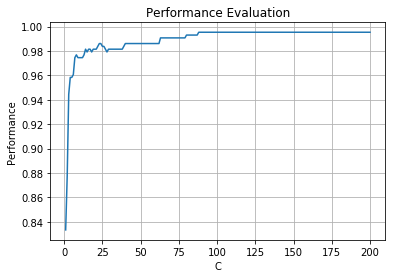

In [38]:
fig, ax = plt.subplots()

ax.plot(c_list,perf)

ax.set(xlabel='C', ylabel='Performance',
       title='Performance Evaluation')
ax.grid()

plt.show()


Display information about the SVM vectors, bias and coeficients. It's also display the SVM classifier parameters used with parameter C as 200.

In [41]:
print('dual coef \n', svm.dual_coef_)
print ('support vectors \n', svm.support_vectors_)
print('index of support vectors \n ', svm.support_)
print ('bias', svm.intercept_)
print('the classifier \n', svm)

dual coef 
 [[  3.98749642e+01   3.89807275e+01   6.36487699e+01   1.76762513e+01
    2.88201032e+01   5.34899394e+00   2.71673433e+01   6.05355215e+01
    0.00000000e+00   3.57279895e+01   2.98114573e+01   0.00000000e+00
    7.40312706e+00   0.00000000e+00   3.79131878e+00   3.79565715e+00
    8.80869124e+00   1.60472850e+01   1.08695297e+01   1.82926017e+01
    5.34369167e+01   1.93931835e+01   0.00000000e+00   0.00000000e+00
    4.71486128e+01   7.08278651e+00   2.19824245e+00   0.00000000e+00
    1.22734545e+01   6.36139030e+01   6.27013312e+01   0.00000000e+00
    5.14573079e+01   1.93306517e+00   1.79157547e+01   5.78443585e+01
    5.00390941e+01   9.98394745e+01   1.49865035e+00   0.00000000e+00
    1.71522004e+01   0.00000000e+00   5.30061862e+01   2.07559907e+01
    0.00000000e+00   0.00000000e+00   0.00000000e+00   8.19831994e+01
    0.00000000e+00   8.76468369e+00   0.00000000e+00   3.77765056e+01
    0.00000000e+00   5.62485835e+00   3.57789822e+01   2.14709946e+00
    3.73

Testing the trained model with parameter C equal to 200, predicting the first rows of the dataset.

In [46]:
prediction_test = svm.predict([[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
                               [0, 3, 2, 0, 0, 0, 0, 1, 0, 1, 0],
                               [0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0],
                               [2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1],
                               [2, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0]])

In [47]:
for pred in prediction_test:
    print(inv_classe[pred])

unacc
unacc
unacc
unacc
unacc
